In [1]:
import sys
import pandas as pd
sys.path.append("../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import importlib
importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    18:28:56 	 ApRESDefs.py @function _setup_logging line 494 - Stream logging level set to DEBUG
DEBUG    18:28:56 	 ApRESDefs.py @function _setup_logging line 495 - Add console handler to logger
DEBUG    18:28:56 	 ApRESDefs.py @function _setup_logging line 508 - File logging level set to DEBUG


In [2]:
def reload(site):
    filename = f'gs://ldeo-glaciology/apres/greenland/2022/single_zarrs/{site}'
    ds = xr.open_dataset(filename,
        engine='zarr', 
        chunks={}) 
    return ds

ds_101 = reload("A101")
ds_103 = reload("A103")
ds_104 = reload("A104")


In [3]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:33601")
client

Connection method: Direct,
Dashboard: /user/glugeorge/proxy/8787/status,
Comm: tcp://127.0.0.1:33601,Workers: 0
Dashboard: /user/glugeorge/proxy/8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


Text(0.5, 1.0, 'A104')

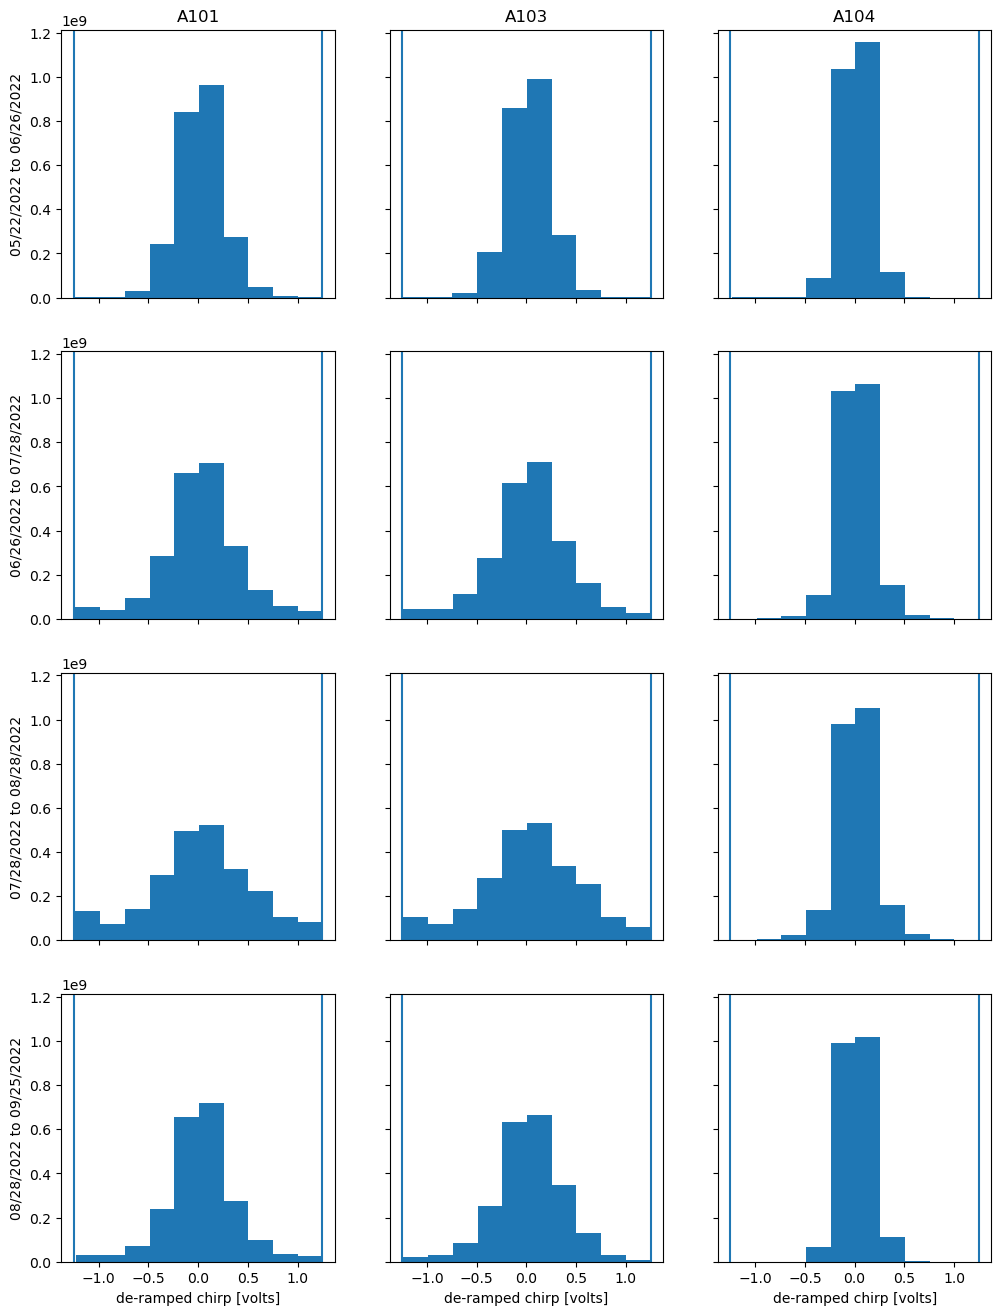

In [24]:
fig = plt.figure(figsize=(12, 16))
axes = fig.subplots(nrows=4, ncols=3,sharex=True,sharey=True)
ds_list = [ds_101,ds_103,ds_104]
time_start = [0, 3000, 6000, 9000]
for i in range(4):
    for j in range(3):
        if i == 3:
            time_end = len(ds_list[j].time)-1
        else:
            time_end = time_start[i+1]
        ds_list[j].isel(attenuator_setting_pair=0,time=range(time_start[i],time_end)).chirp.plot.hist(ax=axes[i][j])
        axes[i][j].axvline(-1.25)
        axes[i][j].axvline(1.25)
        axes[i][j].set_title("")
        if i != 3:
            axes[i][j].set_xlabel("")
        if j == 0:
            axes[i][j].set_ylabel(f"{pd.to_datetime(str(ds_list[j].time.data[time_start[i]])).strftime('%m/%d/%Y')} to {pd.to_datetime(str(ds_list[j].time.data[time_end])).strftime('%m/%d/%Y')}")

# clean up plot
axes[0][0].set_title('A101')
axes[0][1].set_title('A103')
axes[0][2].set_title('A104')

#ds_101.isel(attenuator_setting_pair=0,time=range(0,3000)).chirp.plot.hist()

Text(0.5, 1.0, 'A104')

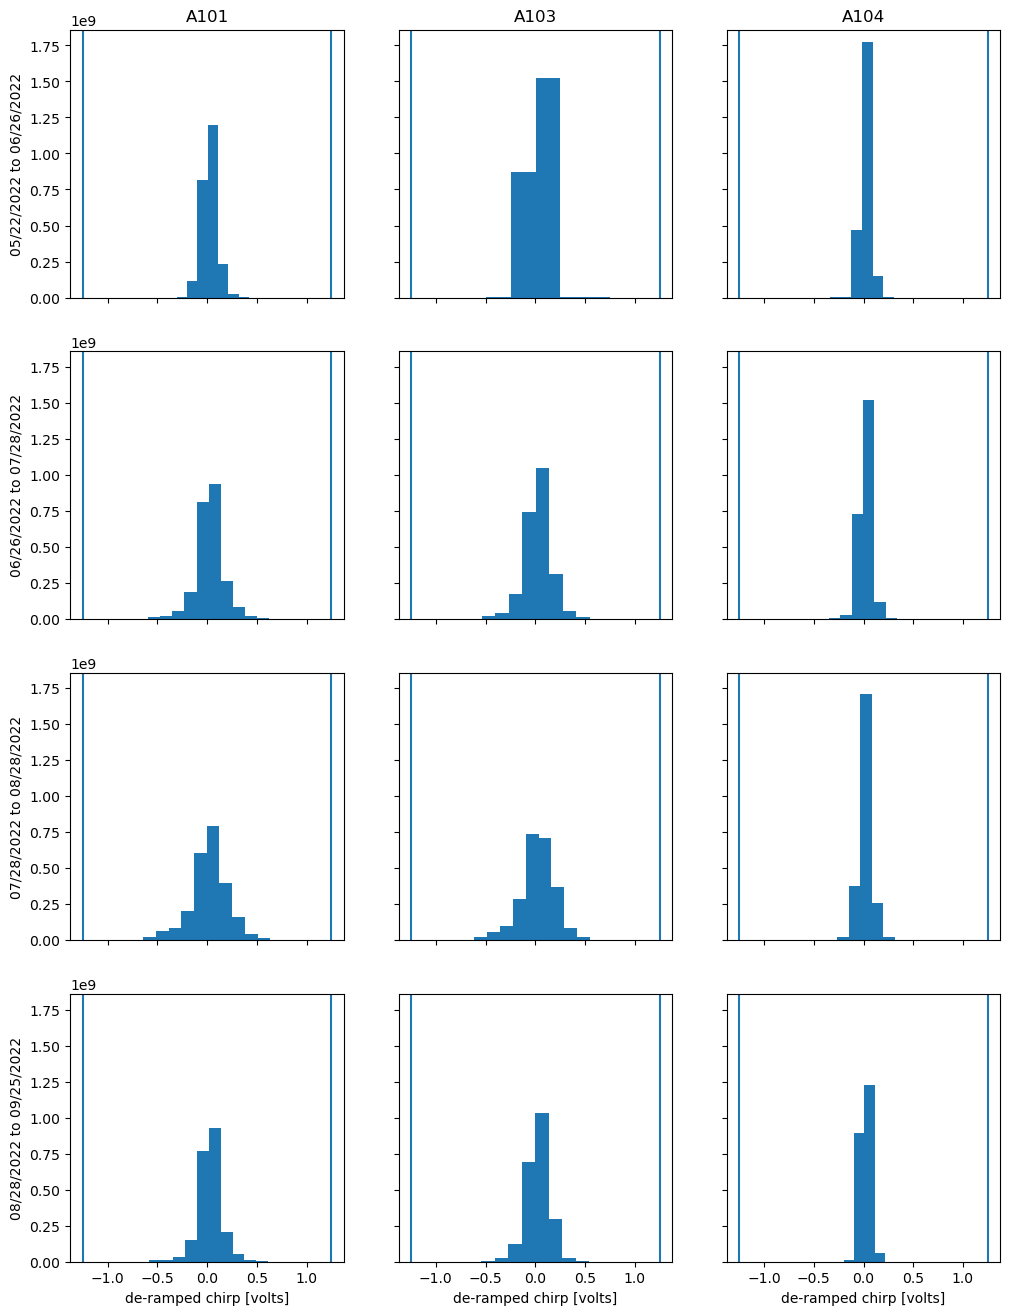

In [25]:
fig = plt.figure(figsize=(12, 16))
axes = fig.subplots(nrows=4, ncols=3,sharex=True,sharey=True)
ds_list = [ds_101,ds_103,ds_104]
time_start = [0, 3000, 6000, 9000]
for i in range(4):
    for j in range(3):
        if i == 3:
            time_end = len(ds_list[j].time)-1
        else:
            time_end = time_start[i+1]
        ds_list[j].isel(attenuator_setting_pair=1,time=range(time_start[i],time_end)).chirp.plot.hist(ax=axes[i][j])
        axes[i][j].axvline(-1.25)
        axes[i][j].axvline(1.25)
        axes[i][j].set_title("")
        if i != 3:
            axes[i][j].set_xlabel("")
        if j == 0:
            axes[i][j].set_ylabel(f"{pd.to_datetime(str(ds_list[j].time.data[time_start[i]])).strftime('%m/%d/%Y')} to {pd.to_datetime(str(ds_list[j].time.data[time_end])).strftime('%m/%d/%Y')}")

# clean up plot
axes[0][0].set_title('A101')
axes[0][1].set_title('A103')
axes[0][2].set_title('A104')

#ds_101.isel(attenuator_setting_pair=0,time=range(0,3000)).chirp.plot.hist()

In [4]:
ds_101.isel(attenuator_setting_pair=1).AFGain.compute()

<xarray.DataArray 'AFGain' ()>
array(-14)
Coordinates:
    AFGain      int64 -14
    attenuator  float64 5.0
Attributes:
    long_name:  audio-frequency gain control setting
    units:      decibels

2023-01-22 00:10:48,612 - distributed.client - WARNING - Couldn't gather 5 keys, rescheduling {"('getitem-43c32231b1f2ade2dc2bcfa9649e3aa2', 16, 0, 0)": ('tcp://127.0.0.1:40295',), "('getitem-43c32231b1f2ade2dc2bcfa9649e3aa2', 14, 0, 0)": ('tcp://127.0.0.1:40295',), "('getitem-43c32231b1f2ade2dc2bcfa9649e3aa2', 13, 0, 0)": ('tcp://127.0.0.1:40295',), "('getitem-43c32231b1f2ade2dc2bcfa9649e3aa2', 17, 0, 0)": ('tcp://127.0.0.1:40295',), "('getitem-43c32231b1f2ade2dc2bcfa9649e3aa2', 15, 0, 0)": ('tcp://127.0.0.1:40295',)}


(array([8.11091900e+07, 3.99630790e+07, 6.71500750e+07, 1.38852070e+08,
        2.14794454e+08, 2.22783189e+08, 1.53459924e+08, 1.11799022e+08,
        5.94997910e+07, 5.06177060e+07]),
 array([-1.23344421, -0.98510361, -0.736763  , -0.48842239, -0.24008179,
         0.00825882,  0.25659943,  0.50494003,  0.75328064,  1.00162125,
         1.24996185]),
 <BarContainer object of 10 artists>)

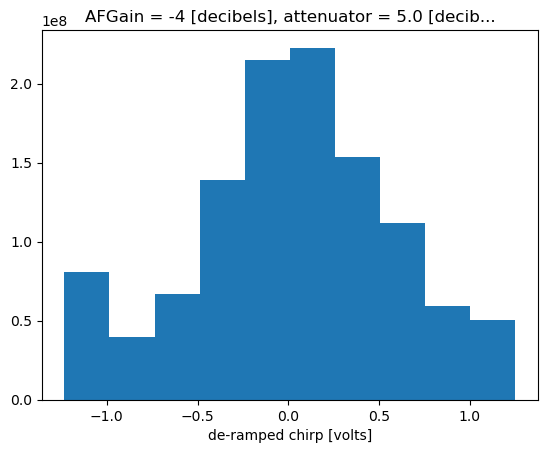

In [4]:
ds_101.isel(attenuator_setting_pair=0,time=range(6000,7500),chirp_num=range(1,20)).chirp.plot.hist()


2023-01-22 00:13:26,401 - distributed.client - WARNING - Couldn't gather 18 keys, rescheduling {"('getitem-0db5bf0f900e15a38200c651910499e9', 42, 0, 0)": ('tcp://127.0.0.1:37043',), "('getitem-0db5bf0f900e15a38200c651910499e9', 50, 0, 0)": ('tcp://127.0.0.1:43807',), "('getitem-0db5bf0f900e15a38200c651910499e9', 37, 0, 0)": ('tcp://127.0.0.1:37861',), "('getitem-0db5bf0f900e15a38200c651910499e9', 44, 0, 0)": ('tcp://127.0.0.1:37043',), "('getitem-0db5bf0f900e15a38200c651910499e9', 39, 0, 0)": ('tcp://127.0.0.1:37861',), "('getitem-0db5bf0f900e15a38200c651910499e9', 53, 0, 0)": ('tcp://127.0.0.1:43807',), "('getitem-0db5bf0f900e15a38200c651910499e9', 29, 0, 0)": ('tcp://127.0.0.1:44851',), "('getitem-0db5bf0f900e15a38200c651910499e9', 30, 0, 0)": ('tcp://127.0.0.1:44851',), "('getitem-0db5bf0f900e15a38200c651910499e9', 41, 0, 0)": ('tcp://127.0.0.1:37043',), "('getitem-0db5bf0f900e15a38200c651910499e9', 36, 0, 0)": ('tcp://127.0.0.1:37861',), "('getitem-0db5bf0f900e15a38200c651910499e9'

(array([4.56222340e+07, 3.07035090e+07, 6.72652220e+07, 1.41606443e+08,
        2.55861554e+08, 2.74404300e+08, 1.53571869e+08, 9.87556790e+07,
        4.20540750e+07, 3.01836150e+07]),
 array([-1.23340607, -0.98506927, -0.73673248, -0.48839569, -0.2400589 ,
         0.00827789,  0.25661469,  0.50495148,  0.75328827,  1.00162506,
         1.24996185]),
 <BarContainer object of 10 artists>)

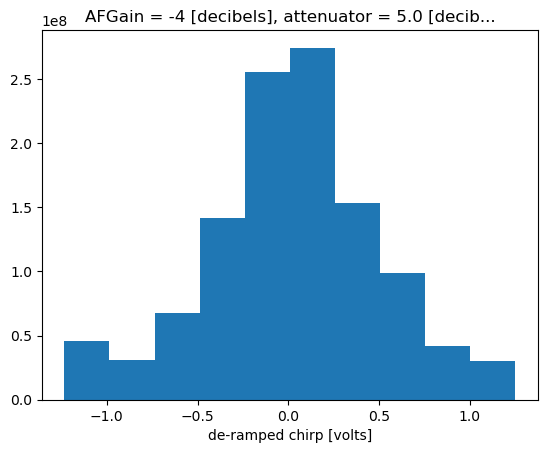

In [5]:
ds_101.isel(attenuator_setting_pair=0,time=range(7500,9000),chirp_num=range(1,20)).chirp.plot.hist()


From above, we can see that the clipping is probably not due to chirps. Now, let's try and see which exact chirps are causing clipping

In [23]:
test = ds_101.chirp.isel(attenuator_setting_pair=0,time=range(6000,6002))
test = abs(test.any()) < 1.249
test

<xarray.DataArray 'chirp' ()>
dask.array<lt, shape=(), dtype=bool, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    AFGain      int64 dask.array<chunksize=(), meta=np.ndarray>
    attenuator  float64 dask.array<chunksize=(), meta=np.ndarray>

In [22]:
test.isel(time=1).plot.hist()

ValueError: Dimensions {'time'} do not exist. Expected one or more of ()

In [30]:
# From A101
test = ds_101.where(abs(ds_101.chirp.isel(attenuator_setting_pair=0,time=range(6000,6100)))>=1.24, drop=True)
test


<xarray.Dataset>
Dimensions:          (time: 2998, chirp_time: 15126, chirp_num: 20,
                      attenuator_setting_pair: 2, profile_range: 6658)
Coordinates:
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19
  * chirp_time       (chirp_time) timedelta64[ns] 00:00:00.000075 ... 00:00:0...
  * profile_range    (profile_range) float64 0.0 0.2103 ... 1.4e+03 1.4e+03
  * time             (time) datetime64[ns] 2022-07-28T00:07:32 ... 2022-08-28...
    attenuator       (attenuator_setting_pair) float64 5.0 5.0
    burst_number     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    filename         (time) <U83 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    battery_voltage  (time, chirp_time, chirp_num) float64 dask.array<chunksize=(20, 15126, 20), meta=np.ndarray>
    chirp            (time, chirp_time, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(20, 15126, 20, 2), meta=np.ndarray>
    latitude         (time, chirp_time, chirp_num) float64 dask.array<chunksize=(20, 15126, 20), meta=np.ndarray>
    longitude        (time, chirp_time, chirp_num) float64 dask.array<chunksize=(20, 15126, 20), meta=np.ndarray>
    profile          (time, profile_range, chirp_num, attenuator_setting_pair, chirp_time) float64 dask.array<chunksize=(20, 6658, 20, 2, 15126), meta=np.ndarray>
    profile_stacked  (time, profile_range, attenuator_setting_pair, chirp_time, chirp_num) float64 dask.array<chunksize=(20, 6658, 2, 15126, 20), meta=np.ndarray>
    temperature_1    (time, chirp_time, chirp_num) float64 dask.array<chunksize=(20, 15126, 20), meta=np.ndarray>
    temperature_2    (time, chirp_time, chirp_num) float64 dask.array<chunksize=(20, 15126, 20), meta=np.ndarray>

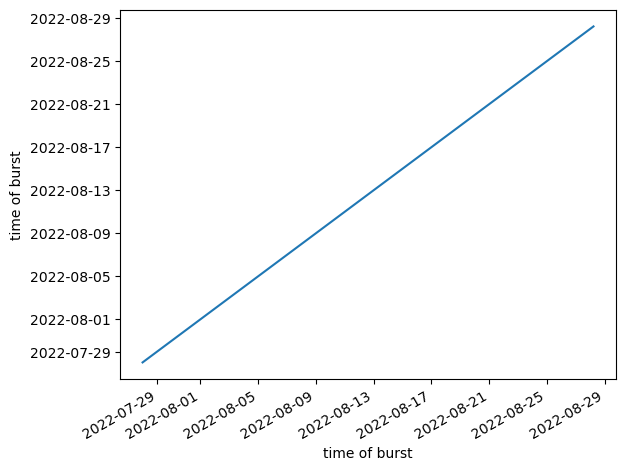

In [31]:
test.time.plot()